# Számítógépes adatelemzés beadandó projekt
### Készítette: Bakó Zsolt, Huszár Péter

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [150]:
df = pd.read_csv('train.csv')
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [151]:
df = df.set_index('id')

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [153]:
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


# Adatvizualizáció

### Kategóriaváltozók arányainak megismerése kördiagram segítségével

In [154]:
# Iskolazottsag szerinti megoszlas
g = df.groupby('education')
one = g.count().iloc[0,:].max()
two = g.count().iloc[1,:].max()
three = g.count().iloc[2,:].max()
four = g.count().iloc[3,:].max()

# Nemek szerinti összeszamolas
g = df.groupby('sex')
female_count = g.count().iloc[0,:].max()
male_count = g.count().iloc[1,:].max()

# Dohanyzas kategoria osszeszamolasa
g = df.groupby('is_smoking')
no_smoke = g.count().iloc[0,:].max()
smoke = g.count().iloc[1,:].max()

# BP Meds kategoria szerinti osszaszamolas
g = df.groupby('BPMeds')
no_bpm = g.count().iloc[0,:].max()
bpm = g.count().iloc[1,:].max()

# Stroke szerinti osszeszamolas
g = df.groupby('prevalentStroke')
no_stroke = g.count().iloc[0,:].max()
stroke = g.count().iloc[1,:].max()

# Hipertonia szerinti osszeszamolas
g = df.groupby('prevalentHyp')
no_hyp = g.count().iloc[0,:].max()
hyp = g.count().iloc[1,:].max()

# Diabetes szerinti osszeszamolas
g = df.groupby('diabetes')
no_diab = g.count().iloc[0,:].max()
diab = g.count().iloc[1,:].max()

# 10 year risk szerinti osszeszamolas
g = df.groupby('TenYearCHD')
no_risk = g.count().iloc[0,:].max()
risk = g.count().iloc[1,:].max()

Text(0.5, 1.0, 'Koszorúér-betegség kialakulásának kockázata szerinti megoszlás')

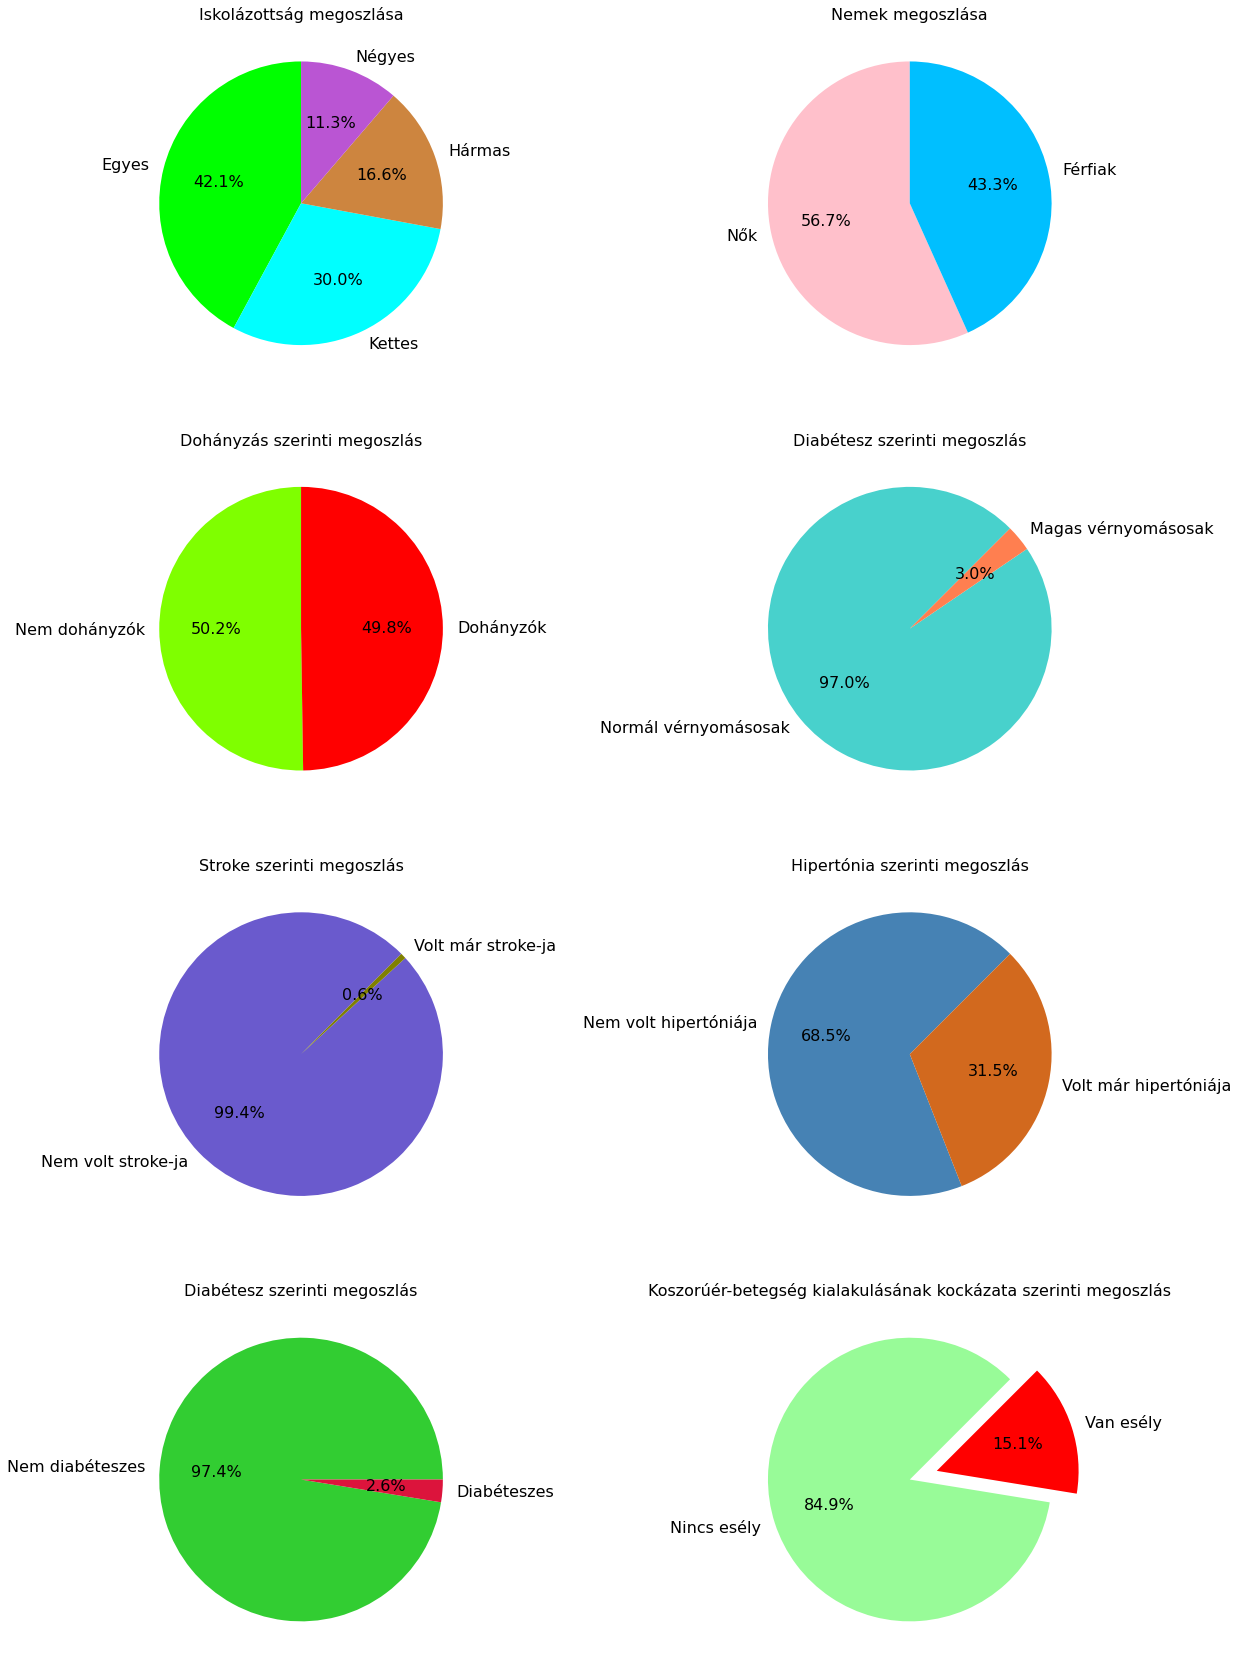

In [155]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(20,30))

ax1.pie([one, two, three, four], labels=['Egyes', 'Kettes', 'Hármas', 'Négyes'], autopct='%1.1f%%',
        colors=['lime', 'aqua', 'peru', 'mediumorchid'], textprops={'fontsize': 16}, startangle=90)
ax1.set_title('Iskolázottság megoszlása', fontsize=16)

ax2.pie([female_count, male_count], labels=['Nők', 'Férfiak'], autopct='%1.1f%%', colors=['pink', 'deepskyblue'],
        textprops={'fontsize': 16}, startangle=90)
ax2.set_title('Nemek megoszlása', fontsize=16)

ax3.pie([no_smoke, smoke], labels=['Nem dohányzók', 'Dohányzók'], autopct='%1.1f%%', colors=['chartreuse', 'red'],
        textprops={'fontsize': 16}, startangle=90)
ax3.set_title('Dohányzás szerinti megoszlás', fontsize=16)

ax4.pie([no_bpm, bpm], labels=['Normál vérnyomásosak', 'Magas vérnyomásosak'], autopct='%1.1f%%',
        colors=['mediumturquoise', 'coral'], textprops={'fontsize': 16}, startangle=45)
ax4.set_title('Diabétesz szerinti megoszlás', fontsize=16)

ax5.pie([no_stroke, stroke], labels=['Nem volt stroke-ja', 'Volt már stroke-ja'], autopct='%1.1f%%',
        colors=['slateblue', 'olive'], textprops={'fontsize': 16}, startangle=45)
ax5.set_title('Stroke szerinti megoszlás', fontsize=16)

ax6.pie([no_hyp, hyp], labels=['Nem volt hipertóniája', 'Volt már hipertóniája'], autopct='%1.1f%%',
        colors=['steelblue', 'chocolate'], textprops={'fontsize': 16}, startangle=45)
ax6.set_title('Hipertónia szerinti megoszlás', fontsize=16)

ax7.pie([no_diab, diab], labels=['Nem diabéteszes', 'Diabéteszes'], autopct='%1.1f%%', colors=['limegreen', 'crimson'],
        textprops={'fontsize': 16})
ax7.set_title('Diabétesz szerinti megoszlás', fontsize=16)

ax8.pie([no_risk, risk], labels=['Nincs esély', 'Van esély'], autopct='%1.1f%%',
        colors=['palegreen', 'red'], textprops={'fontsize': 16}, startangle=45, explode=[0, 0.2])
ax8.set_title('Koszorúér-betegség kialakulásának kockázata szerinti megoszlás', fontsize=16)

### Numerikus változók megismerése

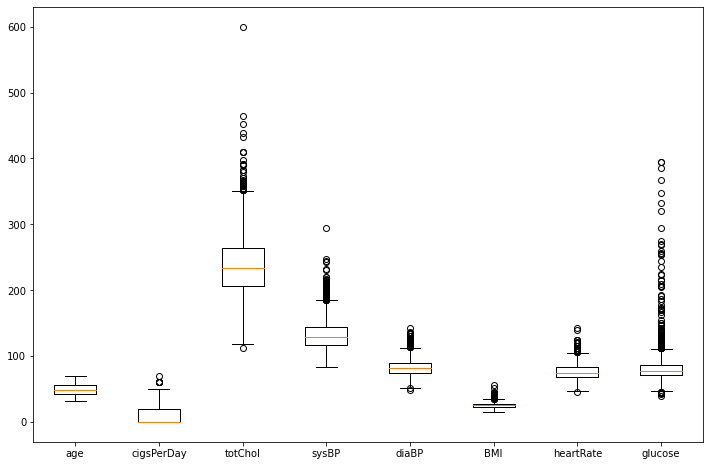

In [156]:
df_clean = df.dropna()
plt.figure(figsize=(12,8))
plt.boxplot(df_clean.iloc[:,[0,4,9,10,11,12,13,14]], labels=df_clean.iloc[:,[0,4,9,10,11,12,13,14]].columns)
plt.show()

### Koszorú ér betegségének veszélye szerint csoportosítva nemek alapján

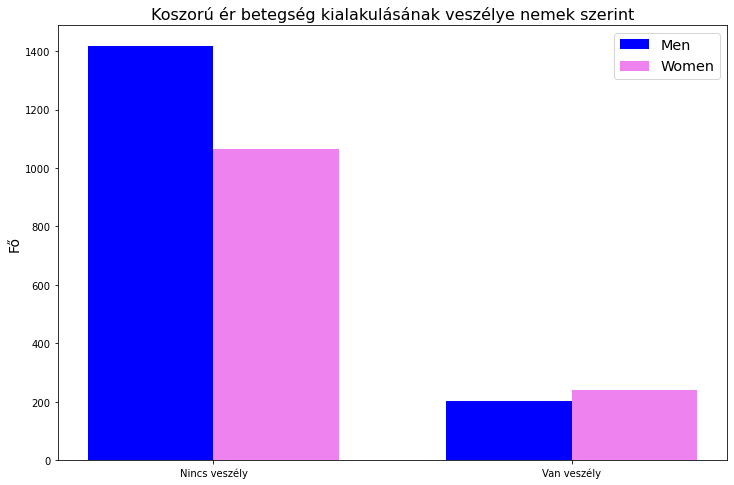

In [157]:
g = df_clean.groupby(['TenYearCHD','sex'])
g.count()['age'][0][0]
g.count()['age']

labels = ['Nincs veszély', 'Van veszély']
women = [g.count()['age'][0][0], g.count()['age'][1][0]]
men = [g.count()['age'][0][1], g.count()['age'][1][1]]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12,8))

rects1 = ax.bar(x - width/2, women, width, label='Men', color = 'blue')
rects2 = ax.bar(x + width/2, men, width, label='Women', color = 'violet')

ax.set_ylabel('Fő', fontsize=14)
ax.set_title('Koszorú ér betegség kialakulásának veszélye nemek szerint', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='best', fontsize='x-large')

plt.show()

### Magas vérnyomásosok (mintához mérten) megoszlása aszerint, hogy kaptak-e gyógyszert vagy sem

In [158]:
df_sort = df_clean.sort_values(by=['heartRate'])
length = len(df_sort['heartRate'])
element = int(length*0.95) # itt lehet allitani a hatart, hogy mi szamit nagy vernyomasnak (a mintahoz merten)

hr = 0
db = 0
for x in df_sort.heartRate:
    if db==element:
        hr = x
    elif db>element:
        hr = (hr+x)/2
        break
    db = db+1
print('A felső kvartilis: ' + str(hr))

A felső kvartilis: 96.0


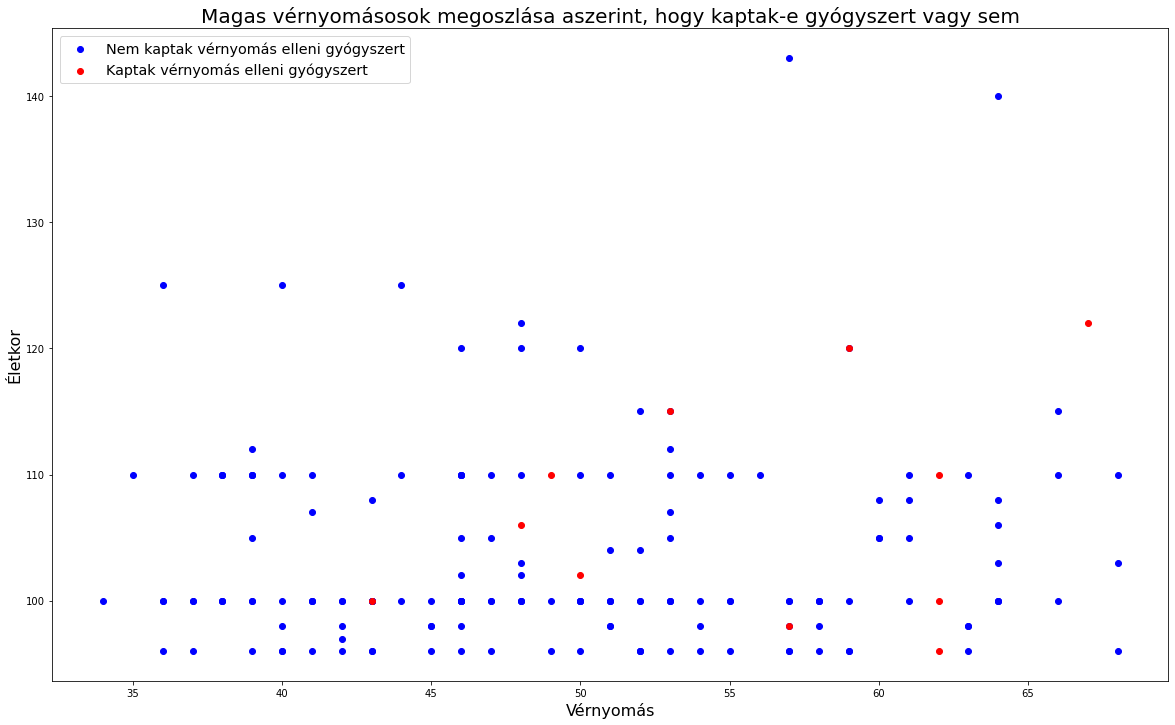

In [159]:
fig, ax = plt.subplots(figsize=(20,12))

ax.scatter(x = df_clean.loc[(df_clean.BPMeds==0) & (df_clean.heartRate >= hr), 'age'],
           y = df_clean.loc[(df_clean.BPMeds==0) & (df_clean.heartRate >= hr), 'heartRate'],
           color='blue', label='Nem kaptak vérnyomás elleni gyógyszert')
ax.scatter(x = df_clean.loc[(df_clean.BPMeds==1) & (df_clean.heartRate >= hr), 'age'],
           y = df_clean.loc[(df_clean.BPMeds==1) & (df_clean.heartRate >= hr), 'heartRate'],
           color='red', label='Kaptak vérnyomás elleni gyógyszert')

ax.legend(loc=2, fontsize='x-large')
plt.xlabel('Vérnyomás', fontsize=16)
plt.ylabel('Életkor', fontsize=16)
plt.title('Magas vérnyomásosok megoszlása aszerint, hogy kaptak-e gyógyszert vagy sem', fontsize=20)
plt.show()


#### A minta ez esetben nem tükrözi a valóságot, mivel a legnagyobb vérnyomás is alig több, mint 140. A való életben ekkora mintavételnél lennének outlierek, valamint az átlag is magasabb lenne. Ettől függetlenül a diagramról leolvashatóak lennének azok az emberek, akiknek szükségük lenne magas vérnyomás elleni gyógyszerre, azonban még kezelésben nem részesültek.

# Korrelációs mátrix

<AxesSubplot:>

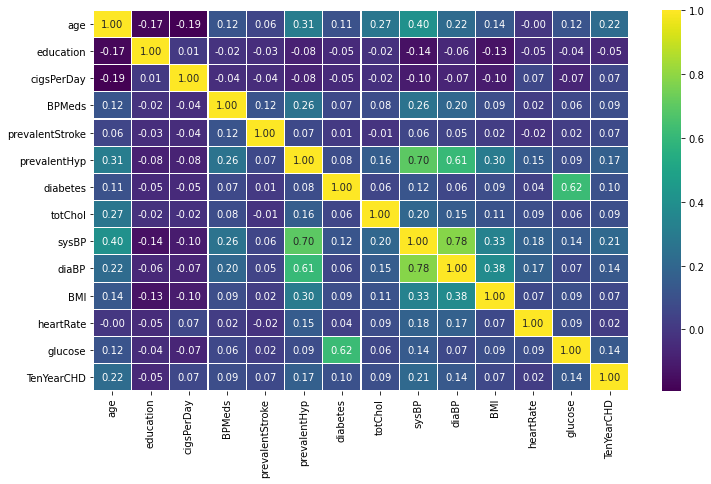

In [160]:
import seaborn as sns

plt.figure(figsize=(12,7))
corr = df.corr()
sns.heatmap(corr, cmap='viridis', annot=True, fmt='.2f', lw=0.1)

In [161]:
df.isna().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [162]:
# education
df.loc[df.education.isna(), 'education'] = df.education.mean() # kerekített átlaggal
df.education = df.education.round(0)

# cigsPerDay
df.loc[df.cigsPerDay.isna(), 'cigsPerDay'] = df.cigsPerDay.mean() # kerekített átlaggal
df.cigsPerDay = df.cigsPerDay.round(0)

# BPMeds
df.loc[df.BPMeds.isna(), 'BPMeds'] = np.random.randint(0,1) # random értékkel

# totChol
df.loc[df.totChol.isna(), 'totChol'] = df.totChol.mean() # kerekített átlaggal
df.totChol = df.totChol.round(0)

# BMI
df.loc[df.BMI.isna(), 'BMI'] = df.BMI.mean() # átlaggal

# heartRate
df.loc[df.heartRate.isna(), 'heartRate'] = df.heartRate.mean()
df.heartRate = df.heartRate.round(0)

# glucose
df.loc[df.glucose.isna(), 'glucose'] = df.glucose.mean() # kerekített átlaggal
df.glucose = df.glucose.round(0)

In [163]:
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [164]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

def Encoder(x):
    x = le.fit_transform(x)
    return x

df.sex = Encoder(df.sex)
df.is_smoking = Encoder(df.is_smoking)

In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:15]
Y = df.loc[:, 'TenYearCHD']

#sc = StandardScaler()
#X = sc.fit_transform(X)

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2)

In [166]:
from imblearn.over_sampling import SMOTE

minta = SMOTE()
x_train, y_train = minta.fit_resample(x_train, y_train.ravel())

# Logistic Regression

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

y_pred_log = log_reg.predict(x_val)
acu_score_log = accuracy_score(y_val, y_pred_log)

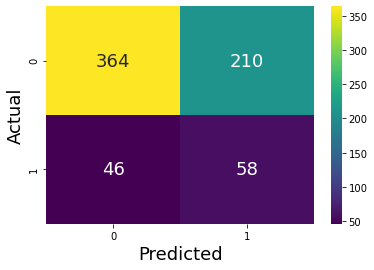

In [168]:
from sklearn.metrics import confusion_matrix

def cm(y_val, y_pred):
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, cmap='viridis', annot=True, fmt = 'd', annot_kws={'size':18})
    plt.xlabel('Predicted', fontsize=18)
    plt.ylabel('Actual', fontsize=18)
    plt.show()
    
cm(y_val, y_pred_log)

# Stochastic Gradient Descent Classifier

In [169]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

parameters={'loss':['hinge', 'log', 'squared_loss'],
            'penalty': ['l2', 'l1', 'elasticnet'],
            'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1]}

grid_search_cv = GridSearchCV(SGDClassifier(), parameters, verbose=1, cv=3)

grid_search_cv.fit(x_train, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


GridSearchCV(cv=3, estimator=SGDClassifier(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1],
                         'loss': ['hinge', 'log', 'squared_loss'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             verbose=1)

In [170]:
best = grid_search_cv.best_estimator_
best

SGDClassifier(alpha=0.001, loss='log')

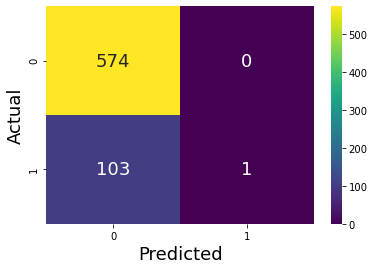

In [171]:
y_pred_sgdc = best.predict(x_val)
acu_score_sgdc = accuracy_score(y_val, y_pred_sgdc)
cm(y_val, y_pred_sgdc)

# Decision Tree Classifier

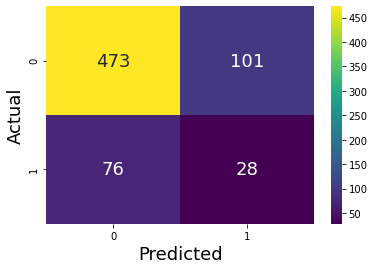

In [172]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', max_depth=10)

tree.fit(x_train, y_train)

y_pred_tree = tree.predict(x_val)
acu_score_dtc = accuracy_score(y_val, y_pred_tree)
cm(y_val, y_pred_tree)

# Support Vector Machine

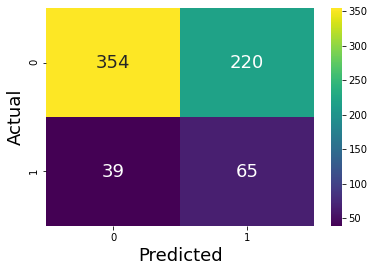

In [173]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)

y_pred_svm = svm.predict(x_val)
acu_score_svm = accuracy_score(y_val, y_pred_svm)
cm(y_val, y_pred_svm)

# Teszt adathalmaz importálása, kezelése

In [174]:
df_test = pd.read_csv('test.csv')
df_test = df_test.set_index('id')
df_test

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
id,,,,,,,,,,,,,,,
3390,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
3391,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
3392,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3393,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
3394,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,46,3.0,F,NO,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.0
4234,58,2.0,F,NO,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.0
4235,55,1.0,M,NO,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,NaN


In [175]:
df_test.isna().sum()

age                 0
education          18
sex                 0
is_smoking          0
cigsPerDay          7
BPMeds              9
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            12
sysBP               0
diaBP               0
BMI                 5
heartRate           0
glucose            84
dtype: int64

In [176]:
# education
df_test.loc[df_test.education.isna(), 'education'] = df_test.education.mean() # kerekített átlaggal
df_test.education = df_test.education.round(0)

# cigsPerDay
df_test.loc[df_test.cigsPerDay.isna(), 'cigsPerDay'] = df_test.cigsPerDay.mean() # kerekített átlaggal
df_test.cigsPerDay = df_test.cigsPerDay.round(0)

# BPMeds
df_test.loc[df_test.BPMeds.isna(), 'BPMeds'] = np.random.randint(0,1) # random értékkel

# totChol
df_test.loc[df_test.totChol.isna(), 'totChol'] = df_test.totChol.mean() # kerekített átlaggal
df_test.totChol = df_test.totChol.round(0)

# BMI
df_test.loc[df_test.BMI.isna(), 'BMI'] = df_test.BMI.mean() # átlaggal

# glucose
df_test.loc[df_test.glucose.isna(), 'glucose'] = df_test.glucose.mean() # kerekített átlaggal
df_test.glucose = df_test.glucose.round(0)

In [177]:
df_test.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64

In [178]:
df_test.sex = Encoder(df_test.sex)
df_test.is_smoking = Encoder(df_test.is_smoking)

# Teszt adathalmazra predikciók lekérése

In [179]:
y_pred_log_test = log_reg.predict(df_test)
y_pred_sgdc_test = best.predict(df_test)
y_pred_tree_test = tree.predict(df_test)
y_pred_svm_test = svm.predict(df_test)

# Predikciók hozzáfűzése a teszt adathalmazhoz

In [180]:
df_test['LogReg'] = y_pred_log_test
df_test['SGDClassifier'] = y_pred_sgdc_test
df_test['Decision_Tree'] = y_pred_tree_test
df_test['SVM'] = y_pred_svm_test
df_test

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,LogReg,SGDClassifier,Decision_Tree,SVM
id,,,,,,,,,,,,,,,,,,,
3390,43,2.0,1,1,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0,1,0,0,0
3391,56,3.0,0,0,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0,0,0,0,0
3392,58,1.0,0,1,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,81.0,1,0,1,1
3393,47,3.0,0,0,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0,0,0,0,0
3394,44,1.0,1,0,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,81.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,46,3.0,0,0,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.0,0,0,0,0
4234,58,2.0,0,0,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.0,1,0,0,1
4235,55,1.0,1,0,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,81.0,0,0,0,0


# Confusion matrix

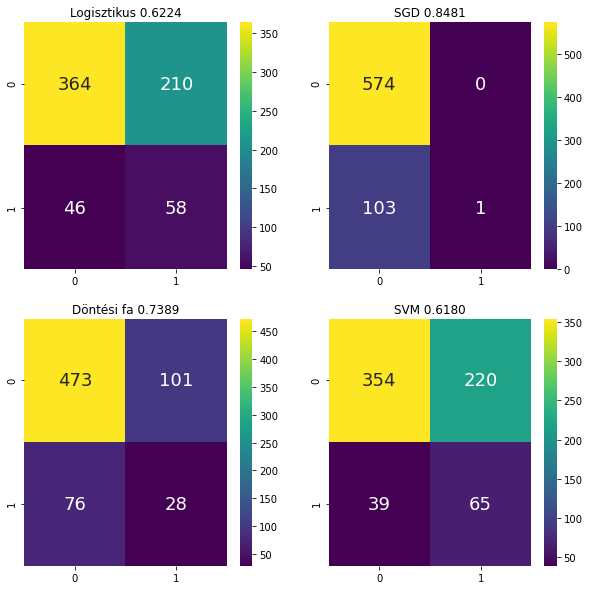

In [181]:
def multicm(y_pred, axs):
    return sns.heatmap(confusion_matrix(y_val, y_pred), cmap='viridis', ax=axs, annot=True, fmt = 'd', annot_kws={'size':18})

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))

ax1 = multicm(y_pred_log, ax1)
ax1.set_title('Logisztikus ' + str('{0:.4f}'.format(accuracy_score(y_val, y_pred_log))))
ax2 = multicm(y_pred_sgdc, ax2)
ax2.set_title('SGD ' + str('{0:.4f}'.format(accuracy_score(y_val, y_pred_sgdc))))
ax3 = multicm(y_pred_tree, ax3)
ax3.set_title('Döntési fa ' + str('{0:.4f}'.format(accuracy_score(y_val, y_pred_tree))))
ax4 = multicm(y_pred_svm, ax4)
ax4.set_title('SVM ' + str('{0:.4f}'.format(accuracy_score(y_val, y_pred_svm))))

plt.show()

# ROC Görbe

In [182]:
from sklearn.metrics import roc_curve, auc

def roc(y_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    auc_score = auc(false_positive_rate, true_positive_rate)
    return false_positive_rate, true_positive_rate, auc_score

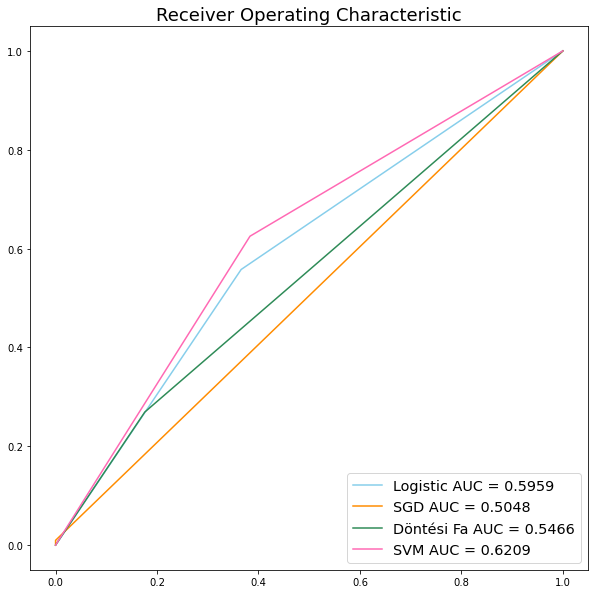

In [183]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot()
f_lg, t_lg, roc_auc = roc(y_pred_log) # logisztikus
ax.plot(f_lg,t_lg, color='skyblue',label = 'Logistic AUC = %0.4f' % roc_auc)
f_lg, t_lg, roc_auc = roc(y_pred_sgdc) # SGD
ax.plot(f_lg,t_lg, color='darkorange',label = 'SGD AUC = %0.4f' % roc_auc)
f_lg, t_lg, roc_auc = roc(y_pred_tree) # DöntésiFa
ax.plot(f_lg,t_lg, color='seagreen',label = 'Döntési Fa AUC = %0.4f' % roc_auc)
f_lg, t_lg, roc_auc = roc(y_pred_svm) # SVM
ax.plot(f_lg,t_lg, color='hotpink',label = 'SVM AUC = %0.4f' % roc_auc)
ax.legend(loc = 4, fontsize='x-large')
plt.title('Receiver Operating Characteristic', fontsize=18)

plt.show()

# Accuracy, ROC_AUC, Precision, Recall, F1

In [184]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

pred_list = [y_pred_log, y_pred_sgdc, y_pred_tree, y_pred_svm]
acc = []
prec = []
recall = []
f1 = []
roc_auc = []

for pred in pred_list:
    acc.append(accuracy_score(y_val, pred))
    prec.append(precision_score(y_val, pred))
    recall.append(recall_score(y_val, pred))
    f1.append(f1_score(y_val, pred))
    roc_auc.append(roc_auc_score(y_val, pred))

In [185]:
summary = pd.DataFrame({'Models':['Logisztikus', 'SGD', 'Döntési fa', 'SVM'],
                        'Accuracy score':acc,
                        'Precision score':prec,
                        'Recall score':recall,
                        'F1 score':f1,
                        'ROC-AUC score':roc_auc})

cm=sns.light_palette('teal',as_cmap=True)

summary.style.background_gradient(cmap=cm)

,Models,Accuracy score,Precision score,Recall score,F1 score,ROC-AUC score
0,Logisztikus,0.622419,0.216418,0.557692,0.311828,0.595919
1,SGD,0.848083,1.000000,0.009615,0.019048,0.504808
2,Döntési fa,0.738938,0.217054,0.269231,0.240343,0.546636
3,SVM,0.617994,0.228070,0.625000,0.334190,0.620862


### Véleményünk szerint a legjobb modell erre az adathalmazra az SVM. Úgy gondoljuk, hogy a legfőbb célja a predikciónak a TP-k kiszűrése, s figyelembe véve az egyéb értékelő adatokat többszöri futtatás után, mi az SVM modell alkalmazását javasolnánk a felhasznált 4 modell közül. (Némely futtatásnál az SGD is nagy arányban szűri ki a TP eseteket, viszont ebben az esetben a FP is irreálisan nagy.)